In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from plotting import *

In [4]:
dataDir = "../results/imagenet1000/"

In [5]:
list_of_runs = []
# If list is empty, all runs of the following experiment will be loaded
experimentName='IMAGENET1000-GPU-CG'

In [6]:
M = 32

### If list of runs is empty, load all runs from [experimentName]

In [7]:
list_of_runs = []
if len(list_of_runs)==0:
    for folder in listdir(dataDir):
        if folder[:len(experimentName)]==experimentName:
            print folder
            list_of_runs.append(folder)

IMAGENET1000-GPU-CG-1-0.005-0.0
IMAGENET1000-GPU-CG-1-0.005-0.3
IMAGENET1000-GPU-CG-1-0.005-0.6
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-1-0.01-0.0
IMAGENET1000-GPU-CG-1-0.01-0.3
IMAGENET1000-GPU-CG-1-0.01-0.6
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.0
IMAGENET1000-GPU-CG-1-0.05-0.3
IMAGENET1000-GPU-CG-1-0.05-0.6
IMAGENET1000-GPU-CG-1-0.05-0.9
IMAGENET1000-GPU-CG-32-0.005-0.0
IMAGENET1000-GPU-CG-32-0.005-0.3
IMAGENET1000-GPU-CG-32-0.005-0.6
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.0
IMAGENET1000-GPU-CG-32-0.01-0.3
IMAGENET1000-GPU-CG-32-0.01-0.6
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.0
IMAGENET1000-GPU-CG-32-0.05-0.3
IMAGENET1000-GPU-CG-32-0.05-0.6
IMAGENET1000-GPU-CG-32-0.05-0.9


### Load listed runs

In [8]:
loss_results, acc_results = load_list_of_runs(list_of_runs,data_dir=dataDir)

Loading run logs:
-----------------
IMAGENET1000-GPU-CG-1-0.005-0.0
IMAGENET1000-GPU-CG-1-0.005-0.3
IMAGENET1000-GPU-CG-1-0.005-0.6
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-1-0.01-0.0
IMAGENET1000-GPU-CG-1-0.01-0.3
IMAGENET1000-GPU-CG-1-0.01-0.6
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.0
IMAGENET1000-GPU-CG-1-0.05-0.3
IMAGENET1000-GPU-CG-1-0.05-0.6
IMAGENET1000-GPU-CG-1-0.05-0.9
IMAGENET1000-GPU-CG-32-0.005-0.0
IMAGENET1000-GPU-CG-32-0.005-0.3
IMAGENET1000-GPU-CG-32-0.005-0.6
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.0
IMAGENET1000-GPU-CG-32-0.01-0.3
IMAGENET1000-GPU-CG-32-0.01-0.6
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.0
IMAGENET1000-GPU-CG-32-0.05-0.3
IMAGENET1000-GPU-CG-32-0.05-0.6
IMAGENET1000-GPU-CG-32-0.05-0.9


## Load times

In [9]:
times = load_times(list_of_runs, M=M, data_dir=dataDir)

Loading run logs:
-----------------
IMAGENET1000-GPU-CG-1-0.005-0.0
IMAGENET1000-GPU-CG-1-0.005-0.3
IMAGENET1000-GPU-CG-1-0.005-0.6
IMAGENET1000-GPU-CG-1-0.005-0.9
IMAGENET1000-GPU-CG-1-0.01-0.0
IMAGENET1000-GPU-CG-1-0.01-0.3
IMAGENET1000-GPU-CG-1-0.01-0.6
IMAGENET1000-GPU-CG-1-0.01-0.9
IMAGENET1000-GPU-CG-1-0.05-0.0
IMAGENET1000-GPU-CG-1-0.05-0.3
IMAGENET1000-GPU-CG-1-0.05-0.6
IMAGENET1000-GPU-CG-1-0.05-0.9
IMAGENET1000-GPU-CG-32-0.005-0.0
IMAGENET1000-GPU-CG-32-0.005-0.3
IMAGENET1000-GPU-CG-32-0.005-0.6
IMAGENET1000-GPU-CG-32-0.005-0.9
IMAGENET1000-GPU-CG-32-0.01-0.0
IMAGENET1000-GPU-CG-32-0.01-0.3
IMAGENET1000-GPU-CG-32-0.01-0.6
IMAGENET1000-GPU-CG-32-0.01-0.9
IMAGENET1000-GPU-CG-32-0.05-0.0
IMAGENET1000-GPU-CG-32-0.05-0.3
IMAGENET1000-GPU-CG-32-0.05-0.6
IMAGENET1000-GPU-CG-32-0.05-0.9


In [103]:
newtimes = [(k,v) for k,v in times.items() if len(v[0])>1]
t = {}
for k,v in newtimes:
    flat = [val for sublist in v for val in sublist]
    t[k] = flat
alpha = []
for k,v in t.items():
    alpha.append((k, np.average(v), len(v)))
alpha.sort() 
for a in alpha:
    print a

('CPU2-4Machine-CG-1-0.0025-0.3', 19.332742592592595, 2160)
('CPU2-4Machine-CG-1-0.005-0.3', 18.512610815602837, 2256)
('CPU2-4Machine-CG-16-0.0025-0.3', 12.444296971478979, 3401)
('CPU2-4Machine-CG-16-0.005-0.3', 12.337040198077483, 3433)
('CPU2-4Machine-CG-2-0.0025-0.3', 15.816719604863222, 2632)
('CPU2-4Machine-CG-2-0.005-0.3', 15.483545252225522, 2696)
('CPU2-4Machine-CG-4-0.0025-0.3', 14.907477142857143, 2800)
('CPU2-4Machine-CG-4-0.005-0.3', 14.924795779685267, 2796)


##  Get basic timing stats

In [10]:
mean_times_dict = mean_times(times, M=M)

IMAGENET1000-GPU-CG-1-0.005-0.9 :	12.8592231105
IMAGENET1000-GPU-CG-1-0.005-0.6 :	12.2848215278
IMAGENET1000-GPU-CG-1-0.005-0.0 :	12.925284157
IMAGENET1000-GPU-CG-1-0.005-0.3 :	12.5108607955
IMAGENET1000-GPU-CG-32-0.005-0.9 :	8.84358025603
IMAGENET1000-GPU-CG-32-0.01-0.9 :	10.0298006338
IMAGENET1000-GPU-CG-32-0.05-0.9 :	9.1735143949
IMAGENET1000-GPU-CG-32-0.005-0.0 :	9.88803383769
IMAGENET1000-GPU-CG-32-0.05-0.6 :	10.0143426184
IMAGENET1000-GPU-CG-32-0.01-0.0 :	8.45141141917
IMAGENET1000-GPU-CG-32-0.05-0.3 :	9.2141221257
IMAGENET1000-GPU-CG-32-0.01-0.6 :	9.8623746564
IMAGENET1000-GPU-CG-32-0.005-0.6 :	9.48577974149
IMAGENET1000-GPU-CG-32-0.05-0.0 :	9.08141635125
IMAGENET1000-GPU-CG-1-0.01-0.9 :	12.7089066092
IMAGENET1000-GPU-CG-1-0.01-0.6 :	12.7231677443
IMAGENET1000-GPU-CG-1-0.01-0.0 :	12.9863871324
IMAGENET1000-GPU-CG-1-0.01-0.3 :	12.9842246324
IMAGENET1000-GPU-CG-32-0.01-0.3 :	9.90413136877
IMAGENET1000-GPU-CG-32-0.005-0.3 :	9.02277187265
IMAGENET1000-GPU-CG-1-0.05-0.0 :	13.20022767

In [ ]:
mean_times_dict

## Histograms (overall, individual workers) and delays throughout for two pairs of sync/async runs

In [ ]:
from plotting import *

In [ ]:
f1=plot_time_hists(['expr5-tf9-4Node-GPU-seed-42562-CG-2-0.0025-0.45','expr5-tf9-4Node-GPU-seed-42562-CG-4-0.0025-0.6','expr5-tf9-4Node-GPU-seed-42562-CG-1-0.005-0.45'], M=4,data_dit=dataDir)


## Overview of all smoothed curves 

In [11]:
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v'}
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v', '0.01':'D'}
marker_dict = {'0.0':',', '0.0005':'s', '0.001':'o', '0.0025':'+', '0.005':'v', '0.01':'D', '0.025':'.', '0.05':'*', '0.1':'^'}

In [12]:
WINDOW = 240

In [ ]:
# f = plot_all_runs(loss_results, window=WINDOW, two_panels=True, marker_dict=marker_dict, mark_every=60,
#                     axis=[None, None, 5.05, 5.20])

## Loss contours

In [15]:
zr = [8, 10]

In [16]:
WINDOW=250

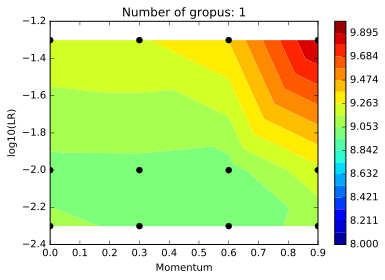

In [17]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=1, zrange=zr)

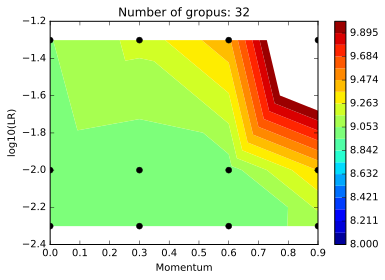

In [18]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=32, zrange=zr)

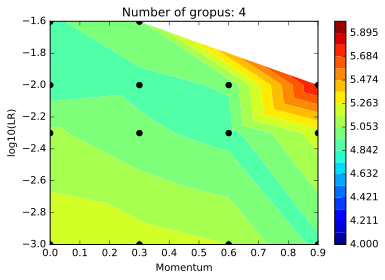

In [130]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=4, zrange=zr)

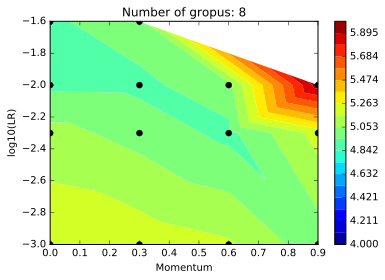

In [131]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=8, zrange=zr)

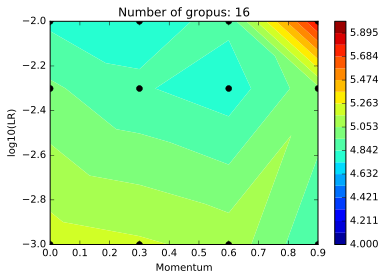

In [132]:
plot_loss_contour(loss_results, window=WINDOW, target_cg=16, zrange=zr)

## Only plot the best run for each momentum value in each mode 

In [ ]:
# dict_of_winners = get_best_for_each_momentum(loss_results,WINDOW)

### DASHED = ASYNC
### SOLID = SYNC

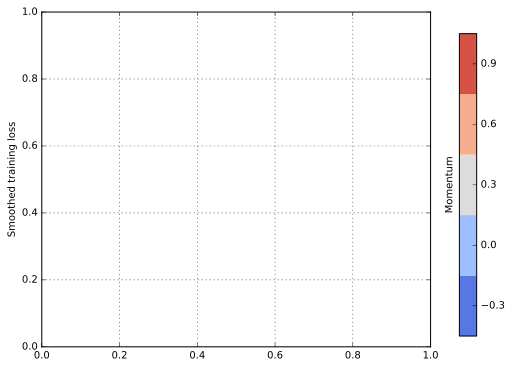

In [40]:
f = plot_all_runs(loss_results, window=WINDOW, two_panels=False, marker_dict=marker_dict, mark_every=100, CG=M)

In [ ]:
# f=plot_momentum_dependence(loss_results, WINDOW)

## Plot winning curves along with evaluation loss level 

In [ ]:
# f=plot_se_calculation(loss_results, WINDOW)

In [ ]:
#f=plot_winners_snr(loss_results, WINDOW)

# Plot HE-SE

In [19]:
WINDOW=500

In [20]:
best_names, best_avg = get_best_for_each_cg(loss_results,window=WINDOW)

In [21]:
best_names

{1.0: 'IMAGENET1000-GPU-CG-1-0.005-0.6',
 32.0: 'IMAGENET1000-GPU-CG-32-0.01-0.0'}

32.0 4256
1.0 2880


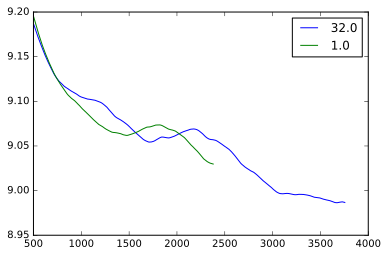

In [22]:
for folder in best_avg:
    plt.plot(best_avg[folder], label=folder)
    print folder, len(loss_results[best_names[folder]])
plt.legend()

[None, None, None, None]

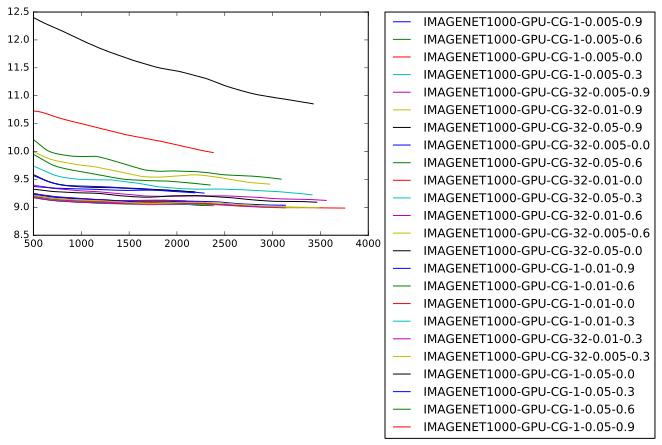

In [24]:
for folder in loss_results.keys():
    plt.plot(moving_average2(loss_results[folder], window_size=WINDOW), label=folder)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis([None, None, None, None])

[ 0.37815126  0.23961661]
[  1.  32.]
[ 1.          0.63365282]


plotting.py:346: RuntimeWarning: invalid value encountered in less_equal
  meets = [np.argmax(best_avg[k]<=target) for k in best_avg ]


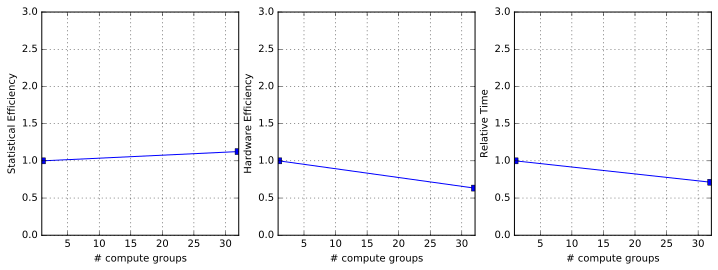

In [25]:
f = plot_se_he(loss_results, WINDOW, M, mean_times_dict=mean_times_dict)

In [26]:
f.savefig('tf0.9-GPU-32node-imagenet1k-aws-se-he.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')